# LIME For Time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score as acc
import numpy as np
from lime import explanation
from lime import lime_base
from third_party.lime_for_time.lime_timeseries import LimeTimeSeriesExplanation
import math

In [2]:
coffee_train = pd.read_csv('third_party/lime_for_time/coffee_train.csv', sep=',', header=None).astype(float)
coffee_train_y = coffee_train.loc[:, 0]
coffee_train_x = coffee_train.loc[:, 1:]

coffee_test = pd.read_csv('third_party/lime_for_time/coffee_test.csv', sep=',', header=None).astype(float)
coffee_test_y = coffee_test.loc[:, 0]
coffee_test_x = coffee_test.loc[:, 1:]

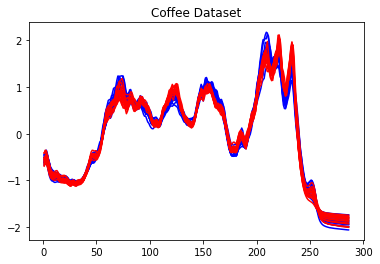

In [3]:
for idx in range(0, len(coffee_train)):
    if coffee_train_y[idx] == 0:
        plt.plot(coffee_train_x.loc[idx, :], 'b')
    else:
        plt.plot(coffee_train_x.loc[idx, :], 'r')
plt.title('Coffee Dataset')
plt.show()

In [4]:
knn = KNN()
knn.fit(coffee_train_x, coffee_train_y)
print('Accuracy KNN for coffee dataset: %f' % (acc(coffee_test_y, knn.predict(coffee_test_x))))

Accuracy KNN for coffee dataset: 0.964286


### EXPLAIN THE DATASET

In [5]:
idx = 5
num_features = 10
num_slices = 24
series = coffee_test_x.iloc[idx, :]

explainer = LimeTimeSeriesExplanation(class_names=['0', '1'], feature_selection='auto')
exp = explainer.explain_instance(series, knn.predict_proba, num_features=num_features, num_samples=5000, 
                                 num_slices=num_slices, replacement_method='total_mean', training_set=coffee_train_x)
exp.as_list()

[(17, -0.40867844994114016),
 (18, 0.31855450203723223),
 (19, 0.3178395396881312),
 (13, -0.21333080931269338),
 (20, 0.15952789729624178),
 (6, -0.15801537725645395),
 (10, 0.14163224677254405),
 (22, -0.13564378008755804),
 (12, -0.13438972004833416),
 (23, -0.11318838501675829)]

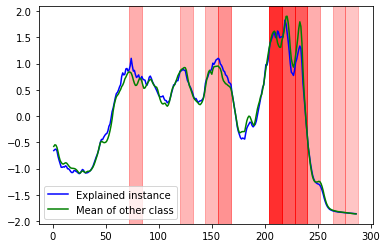

In [6]:
values_per_slice = math.ceil(len(series) / num_slices)
plt.plot(series, color='b', label='Explained instance')
plt.plot(coffee_test_x.iloc[15:,:].mean(), color='green', label='Mean of other class')
plt.legend(loc='lower left')
for i in range(num_features):
    feature, weight = exp.as_list()[i]
    start = feature * values_per_slice
    end = start + values_per_slice
    plt.axvspan(start , end, color='red', alpha=abs(weight*2))
plt.show()